This notebook demonstrates the use of TensorFlow to easily setup simple neural networks.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import tensorflow as tf

In [3]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=1.0)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [4]:
def perceptron(x,w,b):
    return tf.nn.sigmoid(tf.matmul(x,w)+b)

In [10]:
# Method to create and train a fully-connected sigmoid neural net

def trainNN(session,training_data,layer_sizes,batch_size,num_iter):
    num_layers = len(layer_sizes)
    num_samples = training_data[0].shape[0]
    input_length = training_data[0].shape[1]
    
    # Initialize weights, biases
    biases = [bias_variable([l]) for l in layer_sizes]
    
    weights = [0]*num_layers
    weights[0] = weight_variable([input_length,layer_sizes[0]])
    for i in range(1,num_layers):
        weights[i] = weight_variable([layer_sizes[i-1],layer_sizes[i]])
    
    # Construct network graph
    x = tf.placeholder(tf.float32,  shape=(None,input_length))
    y = tf.placeholder(tf.float32,  shape=(None,2))
    
    layers = [0]*num_layers
    layers[0] = perceptron(x,weights[0],biases[0])
    for i in range(1,num_layers):
        layers[i] = perceptron(layers[i-1],weights[i],biases[i])
    
    prediction = tf.nn.softmax(layers[-1])
    logpred = tf.log(prediction)
    temp = y*logpred
    error = -tf.reduce_sum(temp)
    
    # Create training framework
    train_step = tf.train.AdamOptimizer(1e-2).minimize(error)
    correct_prediction = tf.equal(tf.argmax(prediction,1),tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    
    # Train the network
    session.run(tf.initialize_all_variables())
    
    for i in range(num_iter):
        idx = np.random.choice(arange(num_samples),batch_size,replace=False)
        
        fd = {x: training_data[0][idx], y: training_data[1][idx]}
        
        if i%(num_iter/10) == 0:
            step_accuracy = accuracy.eval(feed_dict=fd)
            print("step %d, training accuracy %g"%(i, step_accuracy))
        
        train_step.run(feed_dict = fd)
        
    print("accuracy %g"%accuracy.eval(feed_dict={x:training_data[0],y:training_data[1]}))
    
    return (x,prediction,(weights,biases))

In [6]:
# Definitions for simple geometric datasets

def data_radial(N):
    x = np.random.rand(N,2)
    t = np.linalg.norm(x,axis=1) > 0.4
    y = np.array([t,1-t]).T
    return(x,y)

def data_split(N):
    x = np.random.rand(N,2)
    t = x[:,0]>x[:,1]
    y = np.array([t,1-t]).T
    return(x,y)

def data_spiral(N):
    L=1
    r = linspace(0.2,0.5,N)
    theta = tile(linspace(0,2*pi,N/L,endpoint=False),L)
    
    s1 = np.array([cos(theta),sin(theta)])*r  + 0.5
    s2 = np.array([cos(theta),sin(theta)])*-r + 0.5
    
    s = (np.hstack([s1,s2]).T)
    
    l = zeros([N*2,2])
    l[:N,0]=1
    l[N:,1]=1
    
    return(s,l)

def data_circle(N):
    x = np.random.rand(N,2)
    xadj = x-0.5
    t = np.linalg.norm(xadj,axis=1) < 0.4
    y = np.array([t,1-t]).T
    return(x,y)

In [27]:
# Utilities

def ugrid(k):
    p = linspace(0,1,k,False)
    return np.array(meshgrid(p,p)).reshape([2,k**2]).T

def mgrid(k):
    p = linspace(0,1,k,False)
    return meshgrid(p,p)

def netimage(k,placeholder,predlayer,t):
    figure(figsize=(20,10))
    p = predlayer.eval(feed_dict={plac:ugrid(k)})
    img = (p[:,1]-p[:,0]).reshape([k,k])
    imshow(img,origin="lower",vmin=-t,vmax=t,interpolation="none",cmap="gray_r")
    contour(img,np.array([0]),hold="on",lwd=2.0)

def dscatter(datapoints,s=20):
    c = datapoints[1][:,0]<datapoints[1][:,1]
    scatter(datapoints[0][:,0],datapoints[0][:,1],c=c,s=s)

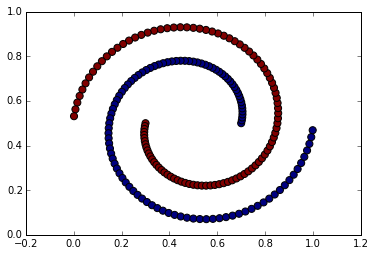

In [28]:
dscatter(data_spiral(100),s=50)

We will be training a classifier on a dataset of the above form.

In [33]:
d = data_spiral(10000)
sess = tf.InteractiveSession()
(plac,pred,(w,b))=trainNN(sess,d,[8,4,2],1000,10000)

step 0, training accuracy 0.494
step 1000, training accuracy 0.726
step 2000, training accuracy 0.771
step 3000, training accuracy 1
step 4000, training accuracy 1
step 5000, training accuracy 1
step 6000, training accuracy 1
step 7000, training accuracy 1
step 8000, training accuracy 1
step 9000, training accuracy 1
accuracy 1


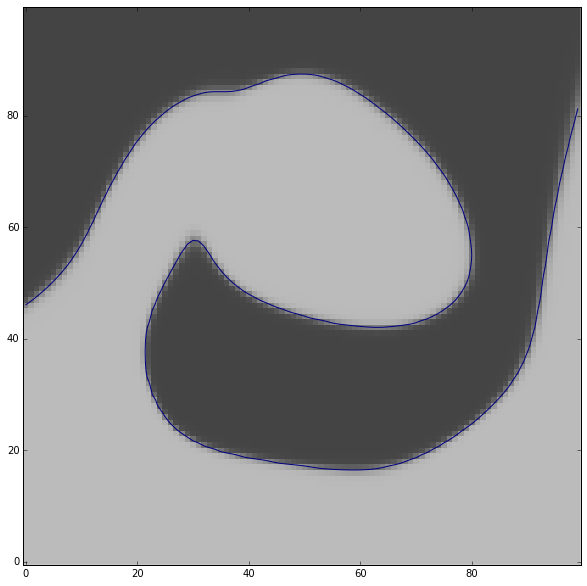

In [34]:
netimage(100,plac,pred,1.0)

In [35]:
sess.close()